<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Convolutional_Neural_Networks(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Convolutional Neural Networks(CNNs)</center>

In [ ]:
# code autocompletion extensions on google colab
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user && jupyter nbextension enable hinterland/hinterland

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 KB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428785 sha256=0a608bfdcaa8eb458c9d65f73f2c470fe410a939e551c96d693ec78892c620e5
  Stored in directory: /root/.cache/pip/wheels/e7/99/91/7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=bbe9657bb449bc440d20400e0b9580121c7fe07e90ad4995daaf9feee739d2b8
  Stored in directory: /root/.cache/pip/wheels/

### Creating the First Layer to Build a CNN<br>
--> adding the first convolutional layer to the CNN model

In [ ]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import numpy as np

Adding first Convolutional layer to the CNN model

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D

# initialize the CNN model
model = tf.keras.Sequential()

# define image shape
image_shape = (300, 300, 3)

# add first Convolutional layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation="relu"))

In [ ]:
# display the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


### **Pooling Layer**

*   Max Pooling
*   Average Pooling

### Create a Pooling Layer for a CNN Model

In [ ]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D

# define the image size
image_shape = (300, 300, 3)

# define the CNN model
model = tf.keras.Sequential()

# add Conv2D layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation="relu"))

# add MaxPool2D layer
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# display model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


### **Flattening Layer**

### Building a CNN Model:
--> Implementing **Conv2D, MaxPool2D** & **Flatten** Layer <br>
--> Building **Human_Horse** Classifier

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image as kimage

In [ ]:
# load the dataset from tensorflow_datasets package
(train_data, test_data), dataset_info = tfds.load("horses_or_humans",
                                                  split=["train", "test"],
                                                  data_dir="content/",
                                                  shuffle_files=True,
                                                  with_info=True
                                                  )

# ensure test_data is an instance of tf.data.Dataset
assert isinstance(test_data, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling content/horses_or_humans/3.0.0.incomplete13M4HZ/horses_or_humans-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling content/horses_or_humans/3.0.0.incomplete13M4HZ/horses_or_humans-test.tfrecord*...:   0%|          |…

Dataset horses_or_humans downloaded and prepared to content/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
# view info about the dataset
# get the shape of the images
image_shape = dataset_info.features["image"].shape
print(f"Shape of the Images:\t {image_shape}")

# number of classes in the dataset
num_classes = dataset_info.features["label"].num_classes
print(f"Number of classes: \t {num_classes}")

# name of classes in the dataset
class_names = dataset_info.features["label"].names
for name in class_names:
    print(f'Label for class "{name}": \t\t{dataset_info.features["label"].str2int(name)}')

Shape of the Images:	 (300, 300, 3)
Number of classes: 	 2
Label for class "horses": 		0
Label for class "humans": 		1


In [ ]:
# view the number of images and distribution of classes in dataset
# Print the total number of examples in the training dataset
print(f'Total examples in Train Dataset: {len(train_data)}')

# Calculate the number of positive samples (humans) in the training dataset
pos_tr_samples = sum(i['label'] for i in train_data)

# Print the number of horses in the training dataset
print(f'Horses in Train Dataset: {len(train_data) - pos_tr_samples}')

# Print the number of humans in the training dataset
print(f'Humans in Train Dataset: {pos_tr_samples}')

# Print a newline character to separate output
print()

# Print the total number of examples in the test dataset
print(f'Total examples in Test Dataset: {len(test_data)}')

# Calculate the number of positive samples (humans) in the test dataset
pos_ts_samples = sum(i['label'] for i in test_data)

# Print the number of horses in the test dataset
print(f'Horses in Test Dataset: {len(test_data) - pos_ts_samples}')

# Print the number of humans in test dataset
print(f'Humans in Test Dataset: {pos_ts_samples}')

Total examples in Train Dataset: 1027
Horses in Train Dataset: 500
Humans in Train Dataset: 527

Total examples in Test Dataset: 256
Horses in Test Dataset: 128
Humans in Test Dataset: 128


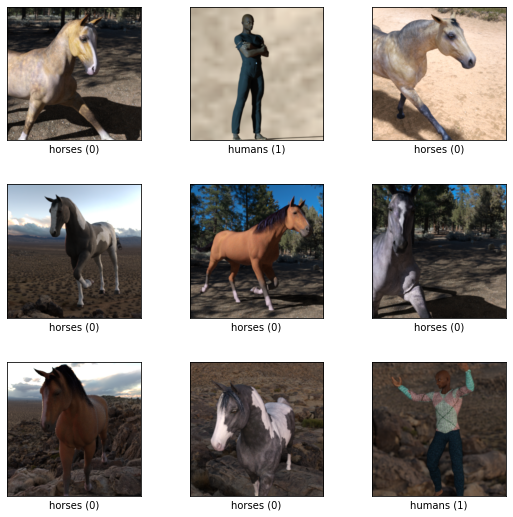

In [ ]:
# view some sample images in the training dataset
fig = tfds.show_examples(train_data, dataset_info)

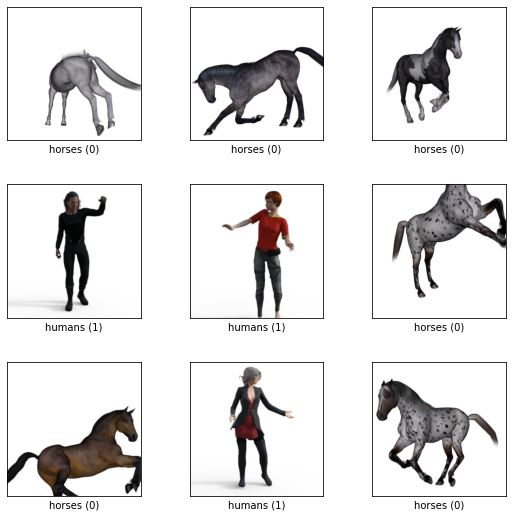

In [ ]:
# view samples images in test dataset
fig = tfds.show_examples(test_data, dataset_info)

Create a CNN model:

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# define the CNN sequential model
model = tf.keras.Sequential()

# add input layer/Conv2D layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
# add a max Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# add another Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
# add another Max Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# add Flatten layer to flatten output from previous layer
model.add(Flatten())
# add a Dense layer 
model.add(Dense(units=512, activation="relu"))

# add another Dense layer with one unit as output layer
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["acc"],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None)

In [ ]:
# display the CNN model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 512)               8

## **Image Augmentation**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image as kimage

#### Building a CNN with More ANN Layers

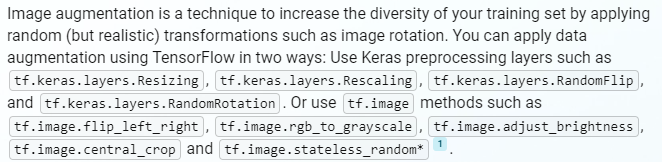

## **Batch Normalization**

#### Building a CNN with Additional Convolutional Layers. 
--> Implementing **Image Augmentation** & **Batch Normalization**

In [ ]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the dataset from tensorflow_datasets package
(train_data, test_data), dataset_info = tfds.load("horses_or_humans",
                                                  split=["train", "test"],
                                                  data_dir="content/",
                                                  shuffle_files=True,
                                                  with_info=True
                                                  )

# ensure test_data is an instance of tf.data.Dataset
assert isinstance(test_data, tf.data.Dataset)

Now, create a function for image transformation on train and test datasets:

In [ ]:
from tensorflow.keras import layers

# create a normalization layer to rescale pixel values from [0, 255] to [0, 1]
normalization_layer = layers.Rescaling(1./255)

# apply normalization layer to the  'image' field of each element in train_data
train_data = train_data.map(
    lambda x: (normalization_layer(x['image']), x['label']),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

# cache the dataset in memory for faster access
train_data = train_data.cache()

# shuffle the dataset
train_data = train_data.shuffle(len(train_data))

# batch the dataset into groups of 128 elements
train_data = train_data.batch(128)

# prefetch data for faster access
train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)

# # Apply the normalization layer to the 'image' field of each element in our_test_dataset
test_data = test_data.map(
    lambda x: (normalization_layer(x['image']), x['label']),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

# cache the dataset in memory for faster access
test_data = test_data.cache()

# batch the dataset into groups of 32 elements
test_data = test_data.batch(32)

# prefetch data for faster access
test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# train the model with the training and test sets
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=15,
                    validation_steps=8,
                    verbose=1)

Epoch 1/15
9/9 [==============================] - 20s 322ms/step - loss: 11.3745 - acc: 0.5667 - val_loss: 1.6516 - val_acc: 0.5000
Epoch 2/15
9/9 [==============================] - 2s 231ms/step - loss: 1.0739 - acc: 0.5102 - val_loss: 0.6562 - val_acc: 0.5000
Epoch 3/15
9/9 [==============================] - 2s 233ms/step - loss: 0.5900 - acc: 0.6845 - val_loss: 0.4925 - val_acc: 0.8086
Epoch 4/15
9/9 [==============================] - 2s 202ms/step - loss: 0.4097 - acc: 0.8111 - val_loss: 0.8647 - val_acc: 0.5703
Epoch 5/15
9/9 [==============================] - 2s 202ms/step - loss: 0.2878 - acc: 0.8851 - val_loss: 0.9156 - val_acc: 0.6680
Epoch 6/15
9/9 [==============================] - 2s 204ms/step - loss: 0.2102 - acc: 0.9172 - val_loss: 1.4697 - val_acc: 0.5703
Epoch 7/15
9/9 [==============================] - 2s 211ms/step - loss: 0.3280 - acc: 0.8685 - val_loss: 0.7187 - val_acc: 0.7500
Epoch 8/15
9/9 [==============================] - 2s 233ms/step - loss: 0.0808 - acc: 0.

Take a batch from the test_data and plot the first image from the batch. Convert the image to an array, then use the model to predict what the image shows:

1/1 [==============================] - 0s 182ms/step
[[0.8778568]]
Image is a human


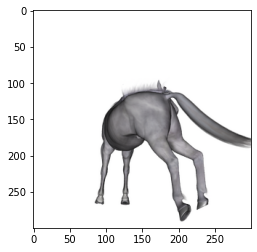

In [ ]:
# Importing the necessary libraries
from matplotlib.pyplot import imshow
import numpy as np
from tensorflow.keras.preprocessing import image as kimage

# Taking the first image and label from the test dataset
for images, lables in test_data.take(1):

    # Displaying the image using Matplotlib's imshow() function
    imshow(np.asarray(images[0]))

    # Converting the image to an array to feed into the CNN model
    image_to_test = kimage.img_to_array(images[0])

    # Wrapping the image in a numpy array for compatibility with the CNN model
    image_to_test = np.array([image_to_test])

    # Making a prediction using the pre-trained CNN model
    prediction = model.predict(image_to_test)

    # Printing the prediction output
    print(prediction)

    # Checking if the predicted value is greater than 0.5, which is the threshold for the binary classification
    if prediction > 0.5:
        print("Image is a human")
    else:
        print("Image is a horse")


Let's take a look at what's happening with each successive layers in the model:

1/1 [==============================] - 0s 323ms/step


<ipython-input-19-145196dbba87>:49: RuntimeWarning: invalid value encountered in true_divide
  img = ((((img - img.mean()) / img.std()) * 64) + 128)


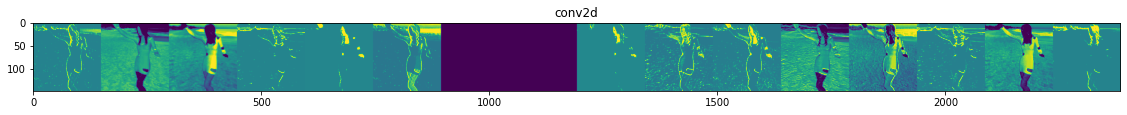

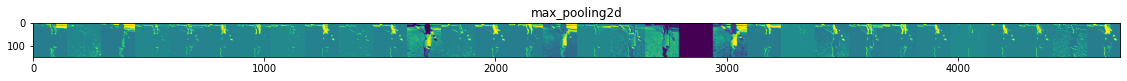

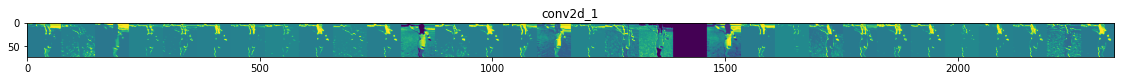

In [ ]:
from keras.api._v2.keras import models
# Initialize an empty list to store the outputs of each layer
layer_outputs = []

# Loop through all layers except the first one (input layer)
for layer in model.layers[1:]:
    # Append the output of each layer to the list
    layer_outputs.append(layer.output)

# Initialize an empty list to store the names of each layer
layer_names = []

# Loop through all layers
for layer in model.layers:
    # Append the name of each layer to the list
    layer_names.append(layer.name)

# Create a new model that takes the input of our original CNN model and outputs the outputs of each layer
features_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Take one random sample from our training dataset
random_sample = train_data.take(1)

# Use our new model to make predictions on this sample and get the output of each layer
layer_predictions = features_model.predict(random_sample)

# Loop through each layer name and its corresponding prediction
for layer_name, prediction in zip(layer_names, layer_predictions):
    # If the prediction does not have 4 dimensions (batch size, height, width, channels), skip this iteration
    if len(prediction.shape) != 4:
        continue

    # Get the number of features (channels) in this prediction
    num_features = prediction.shape[-1]

    # Get the size (height and width) of this prediction
    size = prediction.shape[1]

    # Initialize a grid with zeros to display all features side by side
    grid = np.zeros((size, size * num_features))

    # Loop through each feature (channel)
    for i in range(num_features):
        # Get this feature's image data (height x width)
        img = prediction[0, :, :, i]

        # Normalize this image data by subtracting its mean and dividing by its standard deviation,
        # then scaling it by 64 and adding 128. This will make sure that pixel values are between 0 and 255.
        img = ((((img - img.mean()) / img.std()) * 64) + 128)

        # Clip pixel values between 0 and 255 and convert them to unsigned integers (uint8)
        img = np.clip(img, 0, 255).astype('uint8')

        # Place this image data into its corresponding location on our grid
        grid[:, i * size: (i + 1) * size] = img

    # Calculate a scale factor for displaying images based on number of features (channels)
    scale = 20. / num_features

    # Create a new figure with appropriate size based on scale factor and number of features (channels)
    plt.figure(figsize=(scale * num_features, scale))

    # Set title for this figure as current layer's name
    plt.title(layer_name)

    # Display our grid as an image using matplotlib's imshow function.
    plt.imshow(grid)

# <center><b>Binary Classification</b></center>

Load the **CIFAR-100** dataset

In [ ]:
import tensorflow_datasets as tfds

# load the CIFAR-100 dataset
(train_dataset, test_dataset), dataset_info = tfds.load("cifar100", split=["train", "test"], data_dir="content/Cifar100/",
                                                        shuffle_files=True, as_supervised=True,
                                                        with_info=True)

# ensure that the train dataset is a TensorFlow dataset
assert isinstance(train_dataset, tf.data.Dataset)

# get the shape of the images in the dataset
image_shape = dataset_info.features["image"].shape
print(f"Shape of the Image in the dataset: \t {image_shape}")

# Get the number of classes in the dataset
num_classes = dataset_info.features["label"].num_classes
print(f'Number of Classes in the Dataset: \t{num_classes}')

# Get the names of the classes in the dataset
names_of_classes = dataset_info.features["label"].names
print(f'Names of Classes in the Dataset: \t{names_of_classes}\n')

# Print the total number of examples in the train dataset
print(f'Total examples in Train Dataset: \t{len(train_dataset)}')

# Print the total number of examples in the test dataset
print(f'Total examples in Test Dataset: \t{len(test_dataset)}')

Shape of the Image in the dataset: 	 (32, 32, 3)
Number of Classes in the Dataset: 	100
Names of Classes in the Dataset: 	['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank

Use a rescaling layer to rescale images. Then, build a test and train data pipeline by rescaling, caching, shuffling, batching, and prefetching the images: